📌 Paso 1: Importación de librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

📌 Paso 2: Carga del dataset

In [2]:
# Ruta del dataset de muestra
df = pd.read_csv("../data_sample/student-merged-sample.csv")

# Mostrar las primeras filas
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,M,18,U,GT3,T,4,4,teacher,services,...,4,3,3,2,2,2,0,12,12,13
1,GP,M,17,U,GT3,T,2,3,other,other,...,5,2,2,1,1,2,2,9,12,13
2,GP,M,18,U,LE3,T,3,3,services,health,...,3,2,4,2,4,4,10,10,10,10
3,GP,F,18,U,LE3,T,2,2,other,other,...,4,3,3,1,1,2,0,10,9,12
4,GP,F,15,U,GT3,A,4,3,services,services,...,4,3,2,1,1,1,0,15,14,15


📌 Paso 3: Entendimiento básico del dataset

In [3]:
# Tamaño del dataset
print(f"Filas y columnas: {df.shape}")

# Tipos de datos
df.info()

# Estadísticas básicas
df.describe()

Filas y columnas: (100, 53)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          100 non-null    object
 1   sex             100 non-null    object
 2   age             100 non-null    int64 
 3   address         100 non-null    object
 4   famsize         100 non-null    object
 5   Pstatus         100 non-null    object
 6   Medu            100 non-null    int64 
 7   Fedu            100 non-null    int64 
 8   Mjob            100 non-null    object
 9   Fjob            100 non-null    object
 10  reason          100 non-null    object
 11  guardian_mat    100 non-null    object
 12  traveltime_mat  100 non-null    int64 
 13  studytime_mat   100 non-null    int64 
 14  failures_mat    100 non-null    int64 
 15  schoolsup_mat   100 non-null    object
 16  famsup_mat      100 non-null    object
 17  paid_mat        100 non-nul

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,16.500000,2.910000,2.540000,1.510000,2.000000,0.240000,3.890000,3.10000,2.910000,1.550000,...,3.900000,3.150000,2.920000,1.580000,2.360000,3.430000,3.32000,11.780000,12.060000,12.180000
std,1.210226,1.073981,1.122947,0.745288,0.840875,0.698049,0.973331,0.97959,1.083345,1.095215,...,0.926599,0.957427,1.079469,1.093415,1.381845,1.492439,3.91547,2.761861,2.386071,3.076073
min,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,7.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.00000,2.000000,1.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.00000,10.000000,10.000000,10.750000
50%,16.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.00000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.00000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.00000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.50000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,16.00000,19.000000,17.000000,18.000000


 📌 Paso 4: Comprobación de nulos y duplicados

In [4]:
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de duplicados:", df.duplicated().sum())

Valores nulos por columna:
school            0
sex               0
age               0
address           0
famsize           0
Pstatus           0
Medu              0
Fedu              0
Mjob              0
Fjob              0
reason            0
guardian_mat      0
traveltime_mat    0
studytime_mat     0
failures_mat      0
schoolsup_mat     0
famsup_mat        0
paid_mat          0
activities_mat    0
nursery           0
higher_mat        0
internet          0
romantic_mat      0
famrel_mat        0
freetime_mat      0
goout_mat         0
Dalc_mat          0
Walc_mat          0
health_mat        0
absences_mat      0
G1_mat            0
G2_mat            0
G3_mat            0
guardian_por      0
traveltime_por    0
studytime_por     0
failures_por      0
schoolsup_por     0
famsup_por        0
paid_por          0
activities_por    0
higher_por        0
romantic_por      0
famrel_por        0
freetime_por      0
goout_por         0
Dalc_por          0
Walc_por          0
health_por   

📌 Paso 5: Exploración visual de algunas variables

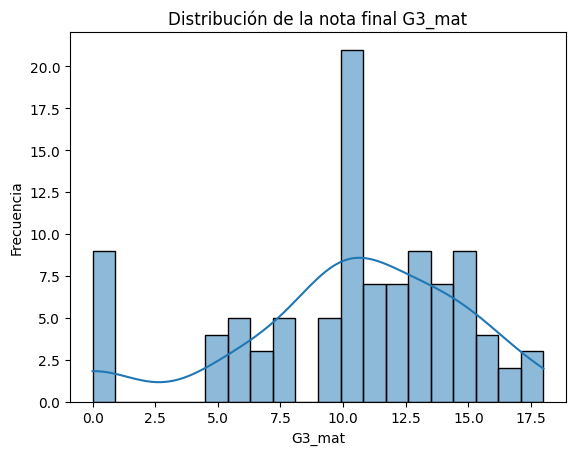

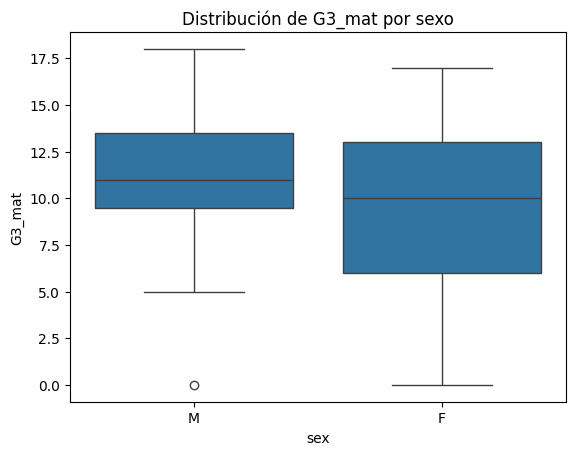

In [5]:
# Distribución de la variable objetivo: nota final (G3_mat)
sns.histplot(df['G3_mat'], bins=20, kde=True)
plt.title("Distribución de la nota final G3_mat")
plt.xlabel("G3_mat")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot por sexo
sns.boxplot(x="sex", y="G3_mat", data=df)
plt.title("Distribución de G3_mat por sexo")
plt.show()

📌 Paso 6: Creación de la variable objetivo binaria

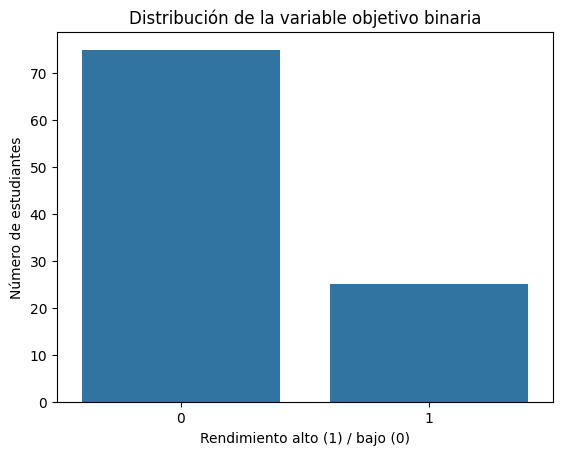

In [6]:
# Creamos la variable binaria: aprobado alto (G3_mat >= 14)
df['target'] = df['G3_mat'].apply(lambda x: 1 if x >= 14 else 0)

# Comprobación de la distribución
sns.countplot(x="target", data=df)
plt.title("Distribución de la variable objetivo binaria")
plt.xlabel("Rendimiento alto (1) / bajo (0)")
plt.ylabel("Número de estudiantes")
plt.show()

📌 Paso 7: Codificación de variables categóricas

In [7]:
# Seleccionamos solo las columnas categóricas
cat_cols = df.select_dtypes(include="object").columns

# Aplicamos codificación LabelEncoder simple para pruebas
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Comprobamos cómo quedó
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,target
0,0,1,18,1,0,1,4,4,4,3,...,3,3,2,2,2,0,12,12,13,0
1,0,1,17,1,0,1,2,3,2,2,...,2,2,1,1,2,2,9,12,13,0
2,0,1,18,1,1,1,3,3,3,1,...,2,4,2,4,4,10,10,10,10,0
3,0,0,18,1,1,1,2,2,2,2,...,3,3,1,1,2,0,10,9,12,0
4,0,0,15,1,0,0,4,3,3,3,...,3,2,1,1,1,0,15,14,15,1


 📌 Paso 8: Separación de variables X e y

In [8]:
X = df.drop(columns=["G3_mat", "target"])
y = df["target"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de test:", X_test.shape)

Tamaño del set de entrenamiento: (80, 52)
Tamaño del set de test: (20, 52)


✅ 1. Preprocesado + división en X y y:

In [11]:
df['high_performance'] = df['G3_mat'].apply(lambda x: 1 if x >= 14 else 0)
df = df.drop(['G1_mat', 'G2_mat', 'G3_mat'], axis=1)
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('high_performance', axis=1)
y = df_encoded['high_performance']


✅ 2. División en train-test:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
